## Capstone Project                                                                       : Machine Leanrning Nano Degree

## Media Product Classification
### by Nagaraju Budigam




## Getting Started

### Project Overview

*Note: This is the original problem that I am developing at production level. Due to company compliance original datasets are not exposed, however the provided datasets are resembling the original datasets.*

Indix hosts the world’s largest collection of programmatically accessible structured product information in the cloud. The products in our database belong to 25 verticals and that translates approximately to 6000 sub-categories. Every product that we carry in our database gets stamped with information about the “category” it belongs to. 

### Problem Statement

Aim of this project is to classifying a product into a particular category, which is very important to serve various use cases – like, helping search, performing product matching, providing category specific insights, and so on. The problem of stamping every product in our catalogue into a category is a Multi Class Classification problem. In this submission I have built a micro version of this classifier where I will predict 4 classes.

## Exploring the Data

In [96]:
import pandas as pd
import numpy as np
%matplotlib inline

#load the training data
training_dataset=pd.read_csv('train.csv',encoding='ISO-8859-1')
#show first few rows
training_dataset.head()

,storeId,url,additionalAttributes,breadcrumbs,label
0,23,http://www.walmart.com/ip/best-of-toto%3A-pian...,Contributed by=Toto;Format=Paperback;Number of...,books > art music & photography > music,books
1,NaN,NaN,NaN,best buy > computers & tablets > computer card...,rest
2,23,https://www.walmart.com/ip/34441317,NaN,music on cd or vinyl > rock music on cd or vin...,music
3,26,https://www.overstock.com/Books-Movies-Music-G...,NaN,books & media > books > cooking & food books >...,books
4,22,http://www.target.com/p/amore-version-ii/-/A-1...,NaN,"target > movies, music & books > music > class...",music



### Featureset Exploration:

* **storeId** - a unique number for identifying a website, numerical data, discrete

* **additionalAttributes**  - Product attribute related to a particular product. These are key, value pairs that can be found in tabular format as product information for most products in e-commerce websites. This is a categorical data.

    * **An example of additionalAttributes** 
    
    {"ASIN": " B000JJRY9M",
    
    "Amazon Bestsellers Rank": " in DVD & Blu-ray (See Top 100 in DVD & Blu-ray)",

    "Average Customer Review": " Be the first to review this item",

    "Classification": " Exempt",

    "DVD Release Date": " 26 Feb. 2007",

    "Format": " AC-3, Colour, Dolby, DVD-Video, PAL",
    
    "Language": " English",
    
    "Number of discs": " 1",
    
    "Region": " Region 2 (This DVD may not be viewable outside Europe. Read more about
    
    DVD formats.)",
    
    "Run Time": " 287 minutes",
    
    "Studio": " Hip-O Records"}
    

* **breadcrumbs** - breadcrumb captured at the page. Breadcrumbs typically appear horizontally across the top of a Web page, often below title bars or headers. This is a categorical data.

    * **An example of breadcrumb**
    subjects > travel > world regions > europe > european nations > france


* **label** - The class to which a product belongs. Values belong to the finite set (‘books’,’music’,‘videos’,’rest’). This is a categorical data.

    It is possible that for some products only one among (2) or (3) might be available.  It means that we may not have data for features 2 and 3 some times.

    The problem statement is to classify the products into any one of the buckets
(i) Books
(ii) Music
(iii) Videos
(iv) Rest - A default class for products which doesn’t belong to (i),(ii) or (iii) category.


### Data Visualization (before Preprocessing)

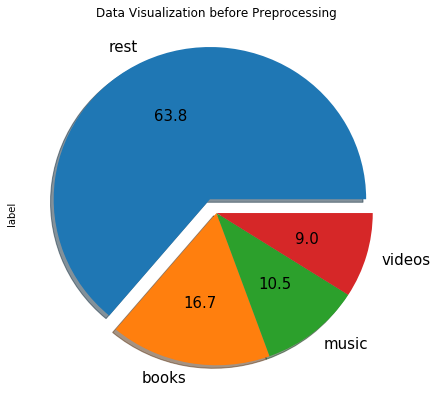

In [97]:
# plot pie chart to visualize the data
training_dataset.label.value_counts().plot(kind='pie',figsize=(7,7),autopct='%1.1f',shadow=True,
                               title='Data Visualization before Preprocessing',explode=(0.1,0,0,0),fontsize=15)

In [98]:
print('Features Description before Pre-processing')
training_dataset.describe()

Features Description before Pre-processing


,storeId,url,additionalAttributes,breadcrumbs,label
count,1770,1094,772,4874,4896
unique,9,1094,771,2700,4
top,23,http://www.barnesandnoble.com/w/golfing-in-haw...,Country of Origin=United States,books,rest
freq,425,1,2,146,3126


## Feature Selection


* From the data exploration, it is straight forward that store id, url and additional attribute features (most of these features are NaNs). Hence they don't contribute to predict the label of a product.


*  I believe that, the feature breadcrumbs are right feature to choose to determine label of the unknown product.

In [99]:
# Feature Selection
#requuired colums breadcrumbs and lables
final_col_list=['breadcrumbs','label']

# now training_dataset has only breadcrumbs and lable columms
training_dataset=training_dataset[final_col_list]



## Data Pre-processing
* In the data processing we drop all the null or NaN rows of breadcrumb and lable columns, we can ignore other columns they are not contributing to predict a label.


* In the second step we remove all the duplicate rows by considering label and breadcrumb columns as they are our point of interest.


* As the data of breadcrumb feature contains special characters, numbers, it would be wise to remove all such noise from the data, I have taken care of this step during the tokenization. 

In [100]:
original_size=training_dataset.shape[0]
print('Original Dataset size : ',original_size)

# Drop NaN rows, if any
training_dataset.dropna(how='any',inplace=True)
print('Dataset size after noise removal: ',training_dataset.shape[0])

training_dataset.drop_duplicates(inplace=True)
print('Dataset size after duplcate removal: ',training_dataset.shape[0])

after_pp_size=training_dataset.shape[0]
print('Total noise removed from Training Dataset is : ',original_size-after_pp_size)

# show the first few rows of cleaned data set
training_dataset.head()

Original Dataset size :  4896
Dataset size after noise removal:  4874
Dataset size after duplcate removal:  2700
Total noise removed from Training Dataset is :  2196


,breadcrumbs,label
0,books > art music & photography > music,books
1,best buy > computers & tablets > computer card...,rest
2,music on cd or vinyl > rock music on cd or vin...,music
3,books & media > books > cooking & food books >...,books
4,"target > movies, music & books > music > class...",music


In [101]:
print('Features Description after Preprocessing')
training_dataset.describe()

Features Description after Preprocessing


,breadcrumbs,label
count,2700,2700
unique,2700,4
top,car,rest
freq,1,1921


### Data Visualization (after Preprocessing)

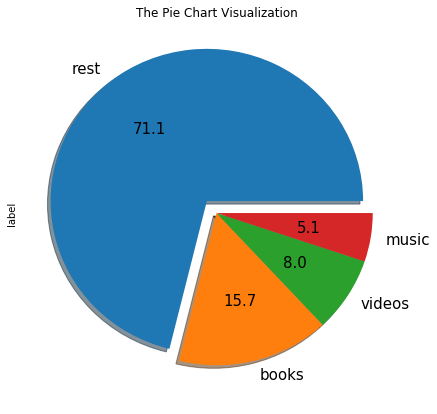

In [71]:
# plot pie chart to visualize the data
training_dataset.label.value_counts().plot(kind='pie',figsize=(7,7),autopct='%1.1f',shadow=True,
                               title='The Pie Chart Visualization',explode=(0.1,0,0,0),fontsize=15)

## Feature Transformation


* As we are dealing with the text or categorical data it is a rule of thumb to transform all such data into numerical form so we can feed it into the machine learning algorithms, as they work only on numerical inputs.


* We use **CountVectorizer** of sklearn machine learning library, where it construct a **Document Term Matrix** and construct **Bag of Words** for the input data.


* After transforming the breadcrumb data we have to transform the labels of each category to a numerical form, We achieve this by using the **Label Encoder** module of sklearn.


In [102]:
import nltk
import string

def tokenize(sentence):
    sentence=sentence.translate(str.maketrans('','',string.punctuation))
    tokens=nltk.word_tokenize(sentence)
    return tokens

# Encode or Transform the categorial labels into numrical values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(training_dataset.label)
training_dataset.label=le.transform(training_dataset.label) 

# show first few lines after encoding labels
training_dataset.head()

,breadcrumbs,label
0,books > art music & photography > music,0
1,best buy > computers & tablets > computer card...,2
2,music on cd or vinyl > rock music on cd or vin...,1
3,books & media > books > cooking & food books >...,0
4,"target > movies, music & books > music > class...",1


## Training and Testing Data Split

As it is a rule of thumb to split the original input data set into training and testing data sets, where training dataset size should be 80% of the original data and testing dataset size would be remaining 20%.


In [103]:
from sklearn.model_selection import train_test_split

#Divide the data into trainign and test sets
X_train, X_test, y_train, y_test = train_test_split(training_dataset.breadcrumbs, 
                                                    training_dataset.label, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print ('Training set has',X_train.shape[0],'samples.')
print ("Testing set has ",X_test.shape[0]," samples.")

Training set has 2160 samples.
Testing set has  540  samples.


## Transform the Categorical data into Numerical Form

* Construct a Document Term Matrix and Bag of Words Model for the input data.

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec=CountVectorizer(tokenizer=tokenize)
X_train=count_vec.fit_transform(X_train) # traiing data
X_test=count_vec.transform(X_test) # test data

## Evaluation Criteria

### Accuracy:

When we want to evaluate a set of predicted labels or performance of Machine Learning models we use different performance measures. Accuracy, Precision, Recall, F-beta (usually people use F-1) or etc. But none of the afore mentioned methods except Accuracy work for Multi-class data where class labels tend to have more than two (binary) different values.

#### Accuracy = true positives + true negatives/dataset size

Well, Accuracy is calculated as the portion of true labelled instances to total number of instances. The questions are what is wrong with accuracy that we need other performance measures? The problem is that in some datasets we can achieve high accuracy with weak models such as a dummy classifier to classify instances with the most frequent label. In cases such as outlier detection or in any dataset that a large portion of samples are of one class label the dummy classifier can achieve a high accuracy such as 80%(in cases that 80% of data are of the majority class label). This is while stronger models may even have lower accuracy. This is called the Accuracy Paradox. Hence, we usually prefer to use other performance measures such as Precision, Recall, F-measure or etc.

Hence I feel that accuracy is not enough and we need a report of classifier about the precision and recall that can better understood through f-beta score.

### F-beta Score:
* F-beta score treats both precision and recall with same importance, when beta=1, let’s say we need model which care a bit more about precision than recall, then we want something more skewed towards precision.
* Smaller the beta the model more skewed towards precision.
* Larger the beta the model more skewed towards recall.
* Note: Finding a good value of beta requires a lot of intuition of data and a lot of experimentation.



##### So, I would like to use accuracy and f-beta score as an evaluation metrics to access the performance of the classifier. I would like to use the beta value as 0.5, so my classifier is a bit skewed towards the precision.

## Algorithms and Techniques:

As per the project problem statement, it is clear that we need to employ the Supervised Machine Learning Algorithms for predicting label of unknown product label. So, I would like to try with the following algorithms and based on the performance metrics mentioned above, would like to pick the best one.

* **Multi Nomial Naive Bayes**: 
    * Super simple, a Naive Bayes classifier will converge quicker than discriminative models like logistic regression, so we need less training data. And even if the NB assumption doesn't hold, a NB classifier still often performs surprisingly well in practice. 


* **Decision Trees**: 
    * Easy to interpret and explain. Non-parametric, so we don't have to worry about outliers or whether the data is linearly separable (e.g., decision trees easily take care of cases where you have class A at the low end of some feature x, class B in the mid-range of feature x, and A again at the high end). 

    
* **SVMs**: 
    * High accuracy, nice theoretical guarantees regarding overfitting, and with an appropriate kernel they can work well even if you're data isn't linearly separable in the base feature space. Especially popular in text classification problems where very high-dimensional spaces are the norm. Memory-intensive and kind of annoying to run and tune, though, so I think random forests are starting to steal the crown.

For all the above mentioned algorithms we feed in a vector constructed usning Bag of Words of Model of the training dataset.



## Creating a Training and Predicting Pipeline

In [105]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test,verbose): 
    results = {}
    training_start = time()
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    training_end = time() 
    results['train_time'] = training_end-training_start
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:sample_size])
    end = time()
    results['pred_time'] = end-start
    results['acc_train'] = accuracy_score(y_train[:sample_size], predictions_train[:sample_size])
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_train'] = fbeta_score(y_train[:sample_size], predictions_train[:sample_size], beta=0.5,average='macro')
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5,average='macro')
    # Success
    if(verbose):
        print ("{} trained on {} samples with accuracy {} and fbeta score {}%".
               format(learner.__class__.__name__, sample_size,(100.0*results['acc_test']),(results['f_test'])))
        #print (results)
    return results

def evaluate(results):
    fig, ax = pl.subplots(2, 3, figsize = (20,8))
    bar_width = 0.19
    colors = ['#F55826','#00A0A0','#E5B506','#284ABC','#59A857']
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training Time")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Prediction Time")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.55), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics of Supervised Learning Models", fontsize = 18, y = 1.10)
    pl.tight_layout()
    pl.show()
    
final_results={}
def metrics_visualization(clfs,verbose):
    results = {}
    samples_100 = len(y_train)
    samples_10 = int((samples_100*0.1))
    samples_1 = int((samples_100*0.01))
    for clf in clfs:
        clf_name = clf.__class__.__name__
        results[clf_name] = {}
        final_results[clf_name] = {}
        for i, samples in enumerate([samples_1, samples_10, samples_100]):
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test,verbose)
            final_results[clf_name][i]= results[clf_name][i]

    evaluate(results)    

## Initial Model Evaluation


Once we perform data pre-processing and transform, we try to fit above mentioned classification models and check which is performing good on the given dataset. You could see the performance metrics of various models fit on the 10%, 50% and 100% of dataset.



* I would like to use accuracy and f-beta score as an evaluation metrics to assess the performance of the classifier.

* As the dataset is unbalanced I would like to use f-beta score as the another evaluation metric, with beta being 0.5.



DecisionTreeClassifier trained on 21 samples with accuracy 82.96296296296296 and fbeta score 0.6157155191791366%
DecisionTreeClassifier trained on 216 samples with accuracy 93.51851851851852 and fbeta score 0.9032324637168456%
DecisionTreeClassifier trained on 2160 samples with accuracy 96.85185185185186 and fbeta score 0.9778483506374877%
RandomForestClassifier trained on 21 samples with accuracy 83.88888888888889 and fbeta score 0.7053527789558807%
RandomForestClassifier trained on 216 samples with accuracy 91.85185185185185 and fbeta score 0.8461372218269347%
RandomForestClassifier trained on 2160 samples with accuracy 96.48148148148148 and fbeta score 0.972400420185244%
MultinomialNB trained on 21 samples with accuracy 90.37037037037037 and fbeta score 0.8722092961424761%
MultinomialNB trained on 216 samples with accuracy 94.44444444444444 and fbeta score 0.9283887043849008%
MultinomialNB trained on 2160 samples with accuracy 96.66666666666667 and fbeta score 0.9681823473598671%
SV

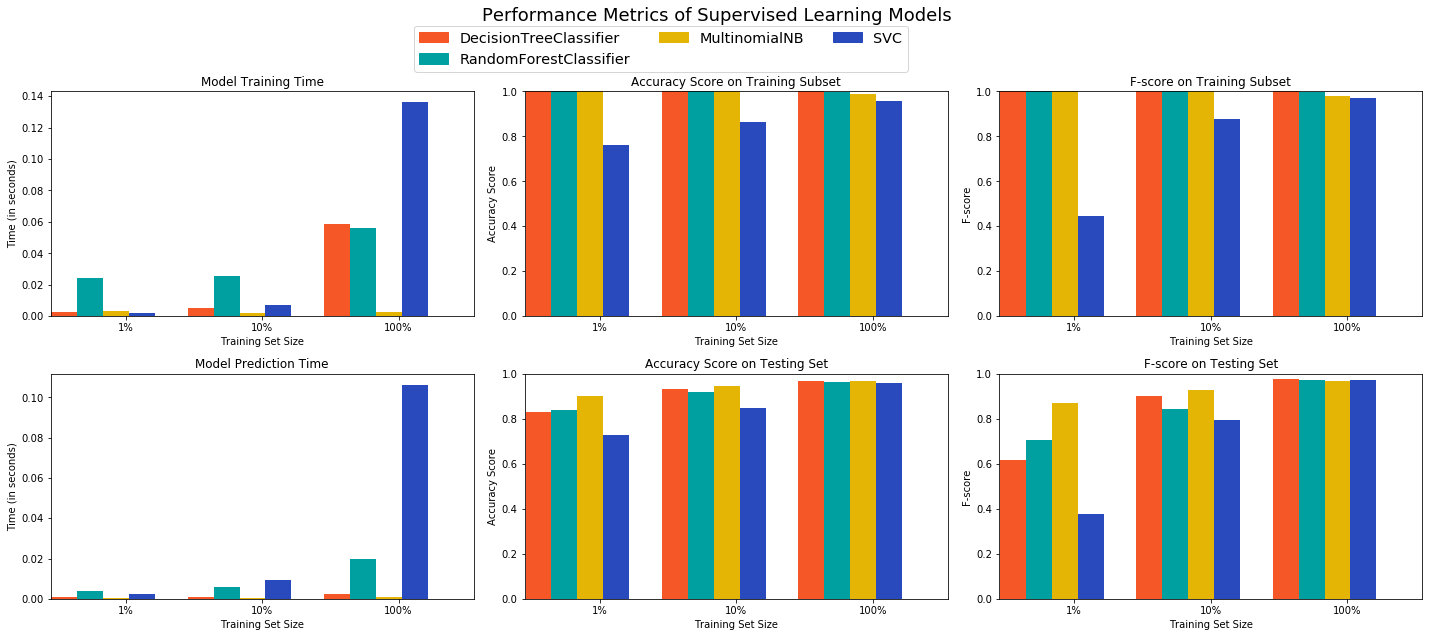

In [113]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "sklearn")
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import math

classifiers=[
DecisionTreeClassifier(random_state=1),
RandomForestClassifier(random_state=1),
MultinomialNB(),
SVC(kernel="linear", C=0.025)]

metrics_visualization(classifiers[:5],verbose=True)

## Hyper Parameter Tuning

* By taking the models accuracy and f-beta score into consideration, I have selected Decision Tree Classifier is the right fit for my problem. 


* So, by using gird search I have performed the hyper parameter tuning to get the best parameter combination of the model.


* It is noticed that even after taking the best parameter combination returned by grid search, the accuracy and f-beta scores of the optimized model is not improved, however by using Decision Tree Classifier I could achieve 96.87% accuracy and 0.977 f-beta score.


In [108]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "sklearn")
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

#Initialize the classifier
clf = DecisionTreeClassifier(random_state=1)

parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2,3],
              "max_depth": [None, 2,3,4,5]
              }

scorer = make_scorer(fbeta_score,beta=0.5,average='macro')
grid_obj = GridSearchCV(clf,parameters,scoring=scorer)
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions,beta = 0.5,average='macro')))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions,beta = 0.5,average='macro')))

Unoptimized model
------
Accuracy score on testing data: 0.9685
F-score on testing data: 0.9778

Optimized Model
------
Final accuracy score on the testing data: 0.9833
Final F-score on the testing data: 0.9772


## Final Model Selection

#### Unoptimized model
* Accuracy score on testing data: 0.9685
* F-score on testing data: 0.9778

#### Optimized Model
* Final accuracy score on the testing data: 0.9833
* Final F-score on the testing data: 0.9772

We could see the significant improvement in the accuracy of the classifier after the grid search and now we've got the best parameters combination to build the final model. 



In [109]:
print('The best Parameter combination for the Final Model.')
best_clf.get_params()

The best Parameter combination for the Final Model.


{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 1,
 'splitter': 'best'}

## Final Model Training

Train the final model by usng best paremeter combination as mentioned above.

In [110]:
from sklearn.tree import DecisionTreeClassifier
print('Training the Final Model started')
clf = DecisionTreeClassifier(class_weight=None,
 criterion='entropy',
 max_depth=None,
 max_features=None,
 max_leaf_nodes=None,
 min_impurity_decrease=0.0,
 min_impurity_split=None,
 min_samples_leaf=1,
 min_samples_split=2,
 min_weight_fraction_leaf=0.0,
 presort=False,
 random_state=1,
 splitter='best')
clf.fit(X_train, y_train)
print('Training the Final Model completed')

Training the Final Model started
Training the Final Model completed


## Predict using Final Model

Original test dataset size  4517
Test dataset size after droping NaNs  4508
Test dataset size after droping duplicates  2669
Transforming Categorica Data to Numerical started
Transforming Categorica Data to Numerical completed
Performing Prediction testdataset started
Performing Prediction testdataset completed
Writing Predicted output to the file predicted_output.csv started
Wrote predicted output to the file predicted_output.csv Sucessfully!!!


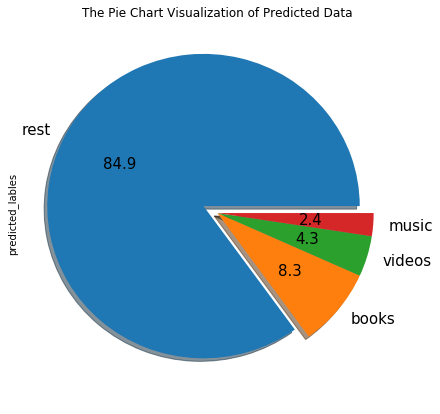

In [111]:
# Load the test dataset
test_dataset=pd.read_csv('evaluation.csv',encoding='ISO-8859-1')
test_dataset.head()
print('Original test dataset size ', test_dataset.shape[0])
test_dataset.dropna(subset=['breadcrumbs'],inplace=True)
print('Test dataset size after droping NaNs ', test_dataset.shape[0])
test_dataset.drop_duplicates(subset=['breadcrumbs'],inplace=True)
print('Test dataset size after droping duplicates ', test_dataset.shape[0])

print('Transforming Categorica Data to Numerical started')
testset_tran=count_vec.transform(test_dataset.breadcrumbs)
print('Transforming Categorica Data to Numerical completed')

print('Performing Prediction testdataset started')
predicted_lables=clf.predict(testset_tran)
print('Performing Prediction testdataset completed')

test_dataset['predicted_lables']=le.inverse_transform(predicted_lables)
print('Writing Predicted output to the file predicted_output.csv started')
test_dataset.to_csv('predicted_output.csv')
print('Wrote predicted output to the file predicted_output.csv Sucessfully!!!')

test_dataset.predicted_lables.value_counts().plot(kind='pie',figsize=(7,7),autopct='%1.1f',shadow=True,
                               title='The Pie Chart Visualization of Predicted Data',explode=(0.1,0,0,0),fontsize=15)